xmin = [3. 2.]
fmin = 0.0
number or iterations = 242


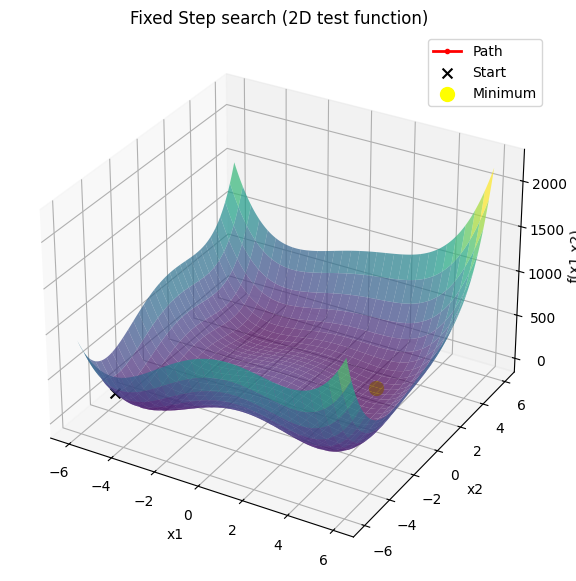

In [4]:
from test_functions import f_himmelblau
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def fixed_step_search(f, a, b, Delta):
    a = np.array(a, dtype=float)
    b = np.array(b, dtype=float)
    n = len(a)

    x = a.copy()
    xmin = a.copy()
    fmin = f(a)
    trace = [x.copy()]

    condition = True

    while condition:
        i = n - 1
        while x[i] > b[i]:
            x[i] = a[i]
            i -= 1
            x[i] = x[i] + Delta
            if x[0] > b[0]:
                condition = False
                break
        if not condition:
            break

        fx = f(x)
        if fx < fmin:
            fmin = fx
            xmin = x.copy()

        x[i] = x[i] + Delta
        trace.append(x.copy())

    return xmin, fmin, np.array(trace)

f_test = f_himmelblau

a = [-5, -5]
b = [5, 5]
Delta = 0.5

xmin, fmin, history = fixed_step_search(f_test, a, b, Delta)

print("xmin =", xmin)
print("fmin =", fmin)
print("number or iterations =", len(history))


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(a[0]-1, b[0]+1, 300)
y = np.linspace(a[1]-1, b[1]+1, 300)
X, Y = np.meshgrid(x, y)
Z = np.array([[f_test([xi, yi]) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, rstride=10, cstride=10, edgecolor='none')

xs = history[:,0].astype(float)
ys = history[:,1].astype(float)
zs = np.array([f_test([x,y]) for x,y in zip(xs, ys)], dtype=float)

line, = ax.plot([], [], [], 'r.-', lw=2, markersize=6, label="Path")
point, = ax.plot([], [], [], 'ro', markersize=6)

ax.scatter(xs[0], ys[0], zs[0], color='black', s=50, marker='x', label='Start')
ax.set_xlabel('x1'); ax.set_ylabel('x2'); ax.set_zlabel('f(x1,x2)')
ax.set_title("Fixed Step search (2D test function)")

ax.scatter(xmin[0], xmin[1], fmin, color="yellow", s=100, label="Minimum")

ax.legend()



def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(frame):
    if frame >= len(xs):
        frame = len(xs)-1
    line.set_data(xs[:frame+1], ys[:frame+1])
    line.set_3d_properties(zs[:frame+1])
    point.set_data([xs[frame]], [ys[frame]])
    point.set_3d_properties([zs[frame]])
    return line, point

anim = FuncAnimation(fig, update, frames=len(xs), init_func=init, interval=300, blit=False, repeat=False)
plt.show()

